No protocol specified


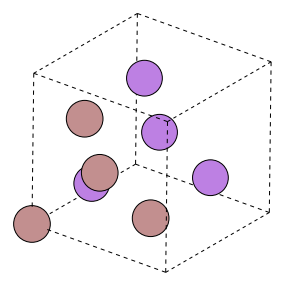

In [35]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
import ase.spacegroup
from ase.spacegroup import crystal
from ase.visualize import view
from ase.io.cif import read_cif
from ase.io.xyz import write_xyz
from ase.io import read, write
from ase.io.xsf import read_xsf, write_xsf
from ase.build import make_supercell, bulk
import numpy as np
from ase import Atoms
from ase.lattice import *
from ase.dft.kpoints import *
from ase.optimize import BFGS,LBFGS
from gpaw import GPAW, PW, FermiDirac 
from ase.constraints import ExpCellFilter

plt.rcParams['axes.facecolor']= 'none'
plt.rcParams['figure.facecolor'] = 'none'

a = 5.628  # Lattice parameter
GaAs = crystal(['Ga','As'],
                basis=[(0,0,0),(0.25,0.25,0.25)], 
                spacegroup=216,
                cellpar=[a,a,a,90,90,90]
              )
bp = GaAs.cell.bandpath()
path = GaAs.cell.bandpath()
atoms =GaAs
atoms.pbc = (False, False, True)
#atoms.center(vacuum=1.0, axis=2)
plt.figure(figsize=(7,5))
ax0 = plot_atoms(atoms,
           radii=0.5,
           rotation='40x,45y,30z',
            )
ax0.set_axis_off()


In [39]:
atoms.cell.get_bravais_lattice().get_special_points()

{'G': array([0, 0, 0]),
 'M': array([0.5, 0.5, 0. ]),
 'R': array([0.5, 0.5, 0.5]),
 'X': array([0. , 0.5, 0. ])}

In [ ]:
! ls 
!pwd

In [ ]:
gaas = read('GaAs2.xyz')
gaas
plt.figure(figsize=(7,5))
ax0 = plot_atoms(gaas,
           radii=0.5,
           rotation='40x,40y,30z',
            )
ax0.set_axis_off()

In [ ]:
view(gaas)
'''
atoms colors 
Ga 0,128,150
As 255,255,0
Al 173,216,230
'''


In [ ]:
from ase.spacegroup import crystal
from ase.spacegroup import Spacegroup
print(Spacegroup(216))

In [ ]:
from icet.tools import map_structure_to_reference
from ase.build import bulk
from ase import Atom


reference = bulk('Au', a=4.00)

supercell = reference.repeat(3)
supercell.rattle(0.1)
supercell.set_cell(1.05 * supercell.cell, scale_atoms=True)

# Switch some atoms to Pd
for i in [0, 1, 5, 8, 10]:
    supercell[i].symbol = 'Pd'

In [ ]:
ax0 = plot_atoms(supercell,
           radii=0.5,
           rotation='45x,-95y,60z',
            )
ax0.set_axis_off()

In [ ]:
from ase.lattice import all_variants


header = """\

Brillouin zone data
-------------------

.. list-table::
    :widths: 10 15 45
"""


entry = """\
    * - {name} ({longname})
      - {bandpath}
      - .. image:: {fname}
            :width: 40 %
"""

with open('bztable.rst', 'w') as fd:
    print(header, file=fd)

    for i, lat in enumerate([CUB(a=3),FCC(a=3),BCC(a=3)]):
        id = '{:02d}.{}'.format(i, lat.variant)
        imagefname = '{}.pdf'.format(id)
        txt = entry.format(name=lat.variant,
                           longname=lat.longname,
                           bandpath=lat.bandpath().path,
                           fname=imagefname)
        print(txt, file=fd)
        ax = lat.plot_bz()
        fig = ax.get_figure()
        fig.savefig(imagefname, bbox_inches='tight')
        fig.clear()
        
        

In [ ]:
from ase.lattice import FCC, MCL
FCC(5.65).plot_bz()

In [ ]:
from ase.lattice.cubic import FaceCenteredCubic
atoms = FaceCenteredCubic(directions=[[1,-1,0], [1,1,-2], [1,1,1]],
                          size=(2,2,3), symbol='Cu', pbc=(1,1,0))


In [ ]:
from ase.lattice.cubic import FaceCenteredCubicFactory
from ase.lattice.cubic import DiamondFactory, SimpleCubicFactory


class ZnSFactory(DiamondFactory):
    "A factory for creating ZnS (B3, Zincblende) lattices."
    element_basis = (0, 1)
zn= ZnSFactory()

zn.plot_bz()

In [22]:
from pyxtal import pyxtal
C1 = pyxtal()
C1.from_seed(lfiles[1])
# Alternative, you can also generate the structure with pre-assigned sites
# C1.from_random(3, 225, ["C"], [12], sites=[["4a", "8c"]])

print(C1)
C1.show()


------Crystal from Seed------
Dimension: 3
Composition: Ga4As4
Group: F-43m (216)
cubic lattice:   5.7502   5.7502   5.7502  90.0000  90.0000  90.0000
Wyckoff sites:
	Ga @ [ 0.0000  0.0000  0.0000], WP [4a] Site [-43m]
	As @ [ 0.7500  0.7500  0.7500], WP [4d] Site [-433mm]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [20]:
lfiles= !ls *.cif
lfiles[1]

'GaAs_mp-2534_primitive.cif'

  2theta     d_hkl     hkl       Intensity  Multi
  26.855     3.320   [ 1  1  1]   100.00        8
  31.107     2.875   [ 2  0  0]     0.07        6
  44.569     2.033   [ 2  2  0]    74.85       12
  52.803     1.734   [ 3  1  1]    44.92       24
  55.346     1.660   [ 2  2  2]     0.02        8
  64.861     1.438   [ 4  0  0]    11.88        6
  71.520     1.319   [ 3  3  1]    17.71       24
  73.679     1.286   [ 4  2  0]     0.04       24
  82.113     1.174   [ 4  2  2]    24.25       24
  88.316     1.107   [ 5  1  1]    13.72       24
  98.648     1.016   [ 4  4  0]     8.57       12



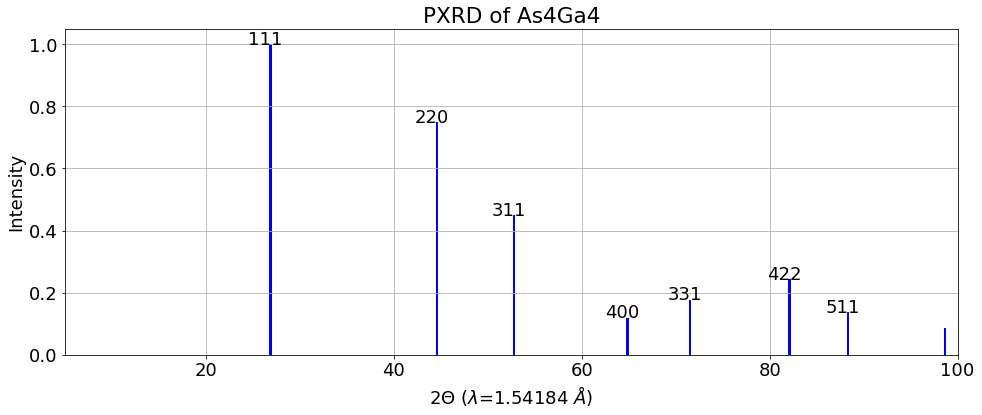

In [28]:
xrd = C1.get_XRD(thetas=[0, 100])
print(xrd)
xrd.plot_pxrd(fontsize=18, figsize=(16,6), show_hkl=True, xlim=[5,100], width=0.5, minimum_I=0.1)

In [34]:
from pyxtal.symmetry import Group
g = Group(216)
g[0]

Wyckoff position 96i in space group 216 with site symmetry 1
x, y, z
-x, -y, z
-x, y, -z
x, -y, -z
z, x, y
z, -x, -y
-z, -x, y
-z, x, -y
y, z, x
-y, z, -x
y, -z, -x
-y, -z, x
y, x, z
-y, -x, z
y, -x, -z
-y, x, -z
x, z, y
-x, z, -y
-x, -z, y
x, -z, -y
z, y, x
z, -y, -x
-z, y, -x
-z, -y, x
x, y+1/2, z+1/2
-x, -y+1/2, z+1/2
-x, y+1/2, -z+1/2
x, -y+1/2, -z+1/2
z, x+1/2, y+1/2
z, -x+1/2, -y+1/2
-z, -x+1/2, y+1/2
-z, x+1/2, -y+1/2
y, z+1/2, x+1/2
-y, z+1/2, -x+1/2
y, -z+1/2, -x+1/2
-y, -z+1/2, x+1/2
y, x+1/2, z+1/2
-y, -x+1/2, z+1/2
y, -x+1/2, -z+1/2
-y, x+1/2, -z+1/2
x, z+1/2, y+1/2
-x, z+1/2, -y+1/2
-x, -z+1/2, y+1/2
x, -z+1/2, -y+1/2
z, y+1/2, x+1/2
z, -y+1/2, -x+1/2
-z, y+1/2, -x+1/2
-z, -y+1/2, x+1/2
x+1/2, y, z+1/2
-x+1/2, -y, z+1/2
-x+1/2, y, -z+1/2
x+1/2, -y, -z+1/2
z+1/2, x, y+1/2
z+1/2, -x, -y+1/2
-z+1/2, -x, y+1/2
-z+1/2, x, -y+1/2
y+1/2, z, x+1/2
-y+1/2, z, -x+1/2
y+1/2, -z, -x+1/2
-y+1/2, -z, x+1/2
y+1/2, x, z+1/2
-y+1/2, -x, z+1/2
y+1/2, -x, -z+1/2
-y+1/2, x, -z+1/2
x+1/2, z, y